# Tasca 6A: Visualització gràfica Multiples variables
### Descripció
Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
# Paràmetres per formatejar els gràfics
titleParams = {'fontsize': 14, 
            'fontweight':'bold',
            'color':'blue',
            'verticalalignment': 'baseline',}
axes_label_params = {'fontsize':12, 'weight':'bold'}



### Exercici 1
Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

> #### Scatter Plots

#### Carreguem el Dataset Tips

In [3]:
DATAPATH='../Data-sources/'
tips = pd.read_csv(DATAPATH+'tips.csv', sep = ',', encoding = 'utf-8')

In [4]:
tips.shape

(244, 7)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.describe().style.format('{:.2f}')

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Camps:
- total_bill: total menjar
- tip: propina
- sex: m/w
- smoker: fumador
- day: dia de la setmana
- time: dinar o sopar
- size: mida de la taula

### Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [8]:
movies = pd.read_csv(DATAPATH+'movies.dat', sep='::', encoding='', names=['movie_id', 'Name','Categories'])
movies.head()

,movie_id,Name,Categories
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_id    3883 non-null   int64 
 1   Name        3883 non-null   object
 2   Categories  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
# a, b = zip(*movies.Name.str.strip(')').str.split('('))
movies[['name','year']] = movies.Name.str.rsplit('(',1,expand=True)
movies['year'] = movies.year.str.strip(')').astype('int')


In [11]:
cat_list = list(set(movies.Categories.str.split('|').sum()))
movies['cat_list'] = movies.Categories.str.split('|')

In [12]:
pd.unique(movies.Categories.str.rsplit('|').sum())

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [13]:
movies = pd.concat((movies,
            pd.DataFrame(data=np.zeros(shape=(movies.shape[0],len(cat_list))),
                 index=movies.index,
                 columns=cat_list)),
            axis=1)

In [14]:
for i, cats in enumerate(movies.cat_list):
    movies.loc[i, cats] = 1.0


In [15]:
movies.head(10)

,movie_id,Name,Categories,name,year,cat_list,Fantasy,Documentary,Animation,Mystery,...,Sci-Fi,Crime,Western,Comedy,Drama,Film-Noir,Adventure,Horror,Thriller,Action
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995,"[Animation, Children's, Comedy]",0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995,"[Adventure, Children's, Fantasy]",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,"[Comedy, Romance]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995,"[Comedy, Drama]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,[Comedy],0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Heat (1995),Action|Crime|Thriller,Heat,1995,"[Action, Crime, Thriller]",0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,7,Sabrina (1995),Comedy|Romance,Sabrina,1995,"[Comedy, Romance]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,Tom and Huck (1995),Adventure|Children's,Tom and Huck,1995,"[Adventure, Children's]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9,Sudden Death (1995),Action,Sudden Death,1995,[Action],0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,GoldenEye,1995,"[Action, Adventure, Thriller]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


<AxesSubplot:>

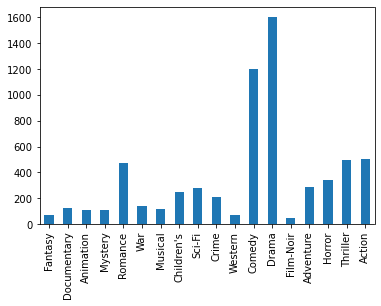

In [16]:
movies[cat_list].sum().plot(kind='bar')

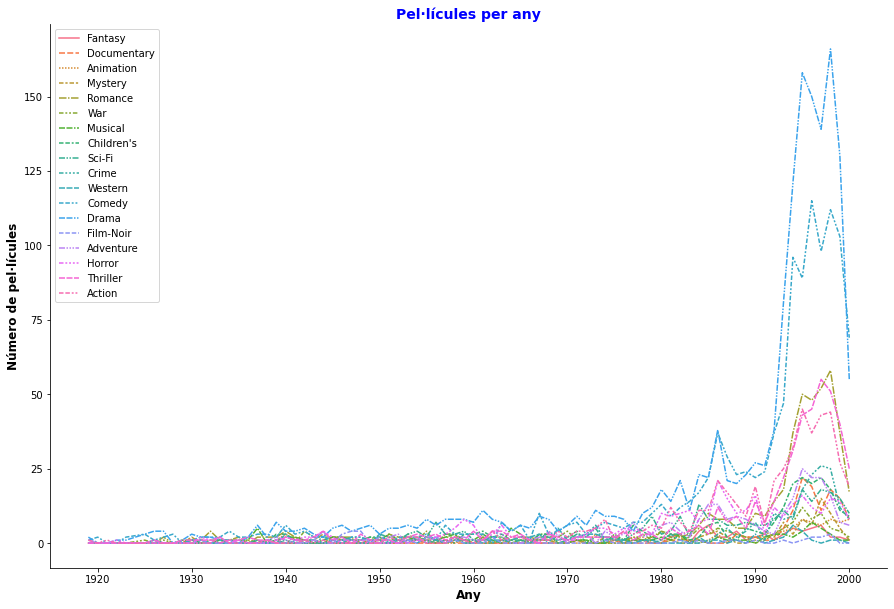

In [17]:
g = plt.figure(figsize=(15,10))
g = sns.lineplot(data=movies.groupby(by='year')[cat_list].sum())

g.set_title('Pel·lícules per any', fontdict=titleParams)

g.xaxis.set_label_text('Any', fontdict=axes_label_params)
g.yaxis.set_label_text('Número de pel·lícules', fontdict=axes_label_params)

sns.despine()

In [18]:
# movies[cat_list].stack()
movies[cat_list].stack()


0     Fantasy        0.0
      Documentary    0.0
      Animation      1.0
      Mystery        0.0
      Romance        0.0
                    ... 
3882  Film-Noir      0.0
      Adventure      0.0
      Horror         0.0
      Thriller       1.0
      Action         0.0
Length: 69894, dtype: float64

In [19]:
movies[cat_list].sum().sort_values()[-5:].index

Index(['Romance', 'Thriller', 'Action', 'Comedy', 'Drama'], dtype='object')

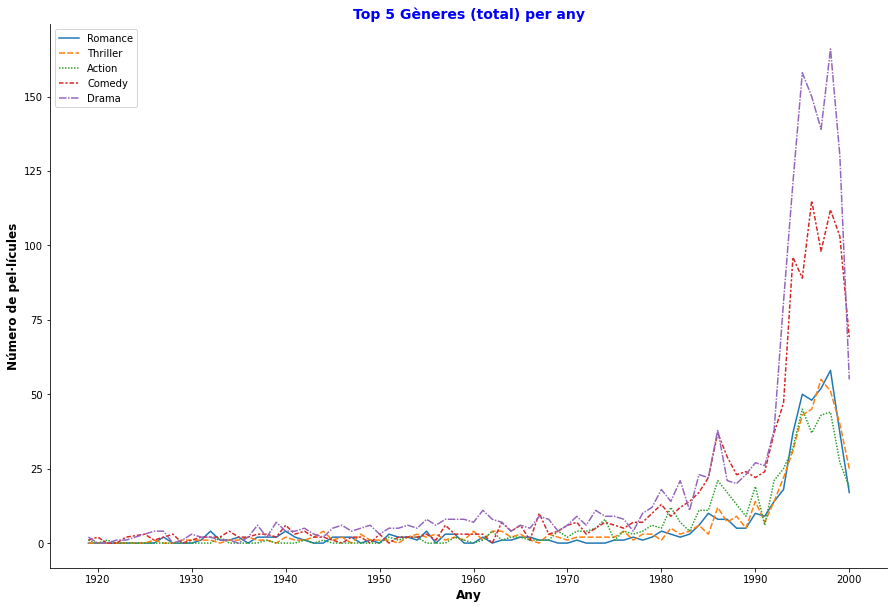

In [20]:
g = plt.figure(figsize=(15,10))
g= sns.lineplot(data=movies.groupby(by='year')[cat_list].sum()[movies[cat_list].sum().sort_values()[-5:].index], )

g.set_title('Top 5 Gèneres (total) per any', fontdict=titleParams)

g.xaxis.set_label_text('Any', fontdict=axes_label_params)
g.yaxis.set_label_text('Número de pel·lícules', fontdict=axes_label_params)

sns.despine()

In [1]:
# movies_year = pd.concat((movies.groupby(by='year').agg({'movie_id':'count'}),
#                         movies.groupby(by='year')[cat_list].sum()), axis=1)


# movies_year.rename(columns={'movie_id':'num_films'}, inplace=True)

# data = movies_year.stack().reset_index()
# data.columns = ['year','cat','total']

# grid = sns.FacetGrid(data[data.cat.isin(cat_list)].sort_values(by='total', ascending=False), 
#                      col='cat', palette='tab20c', hue='cat', col_wrap=4, height=3)

# # grid.map(plt.axhline, y=0, ls=':', c='.5')

# grid.map(sns.lineplot, 'year', 'total', y=0, marker=None)

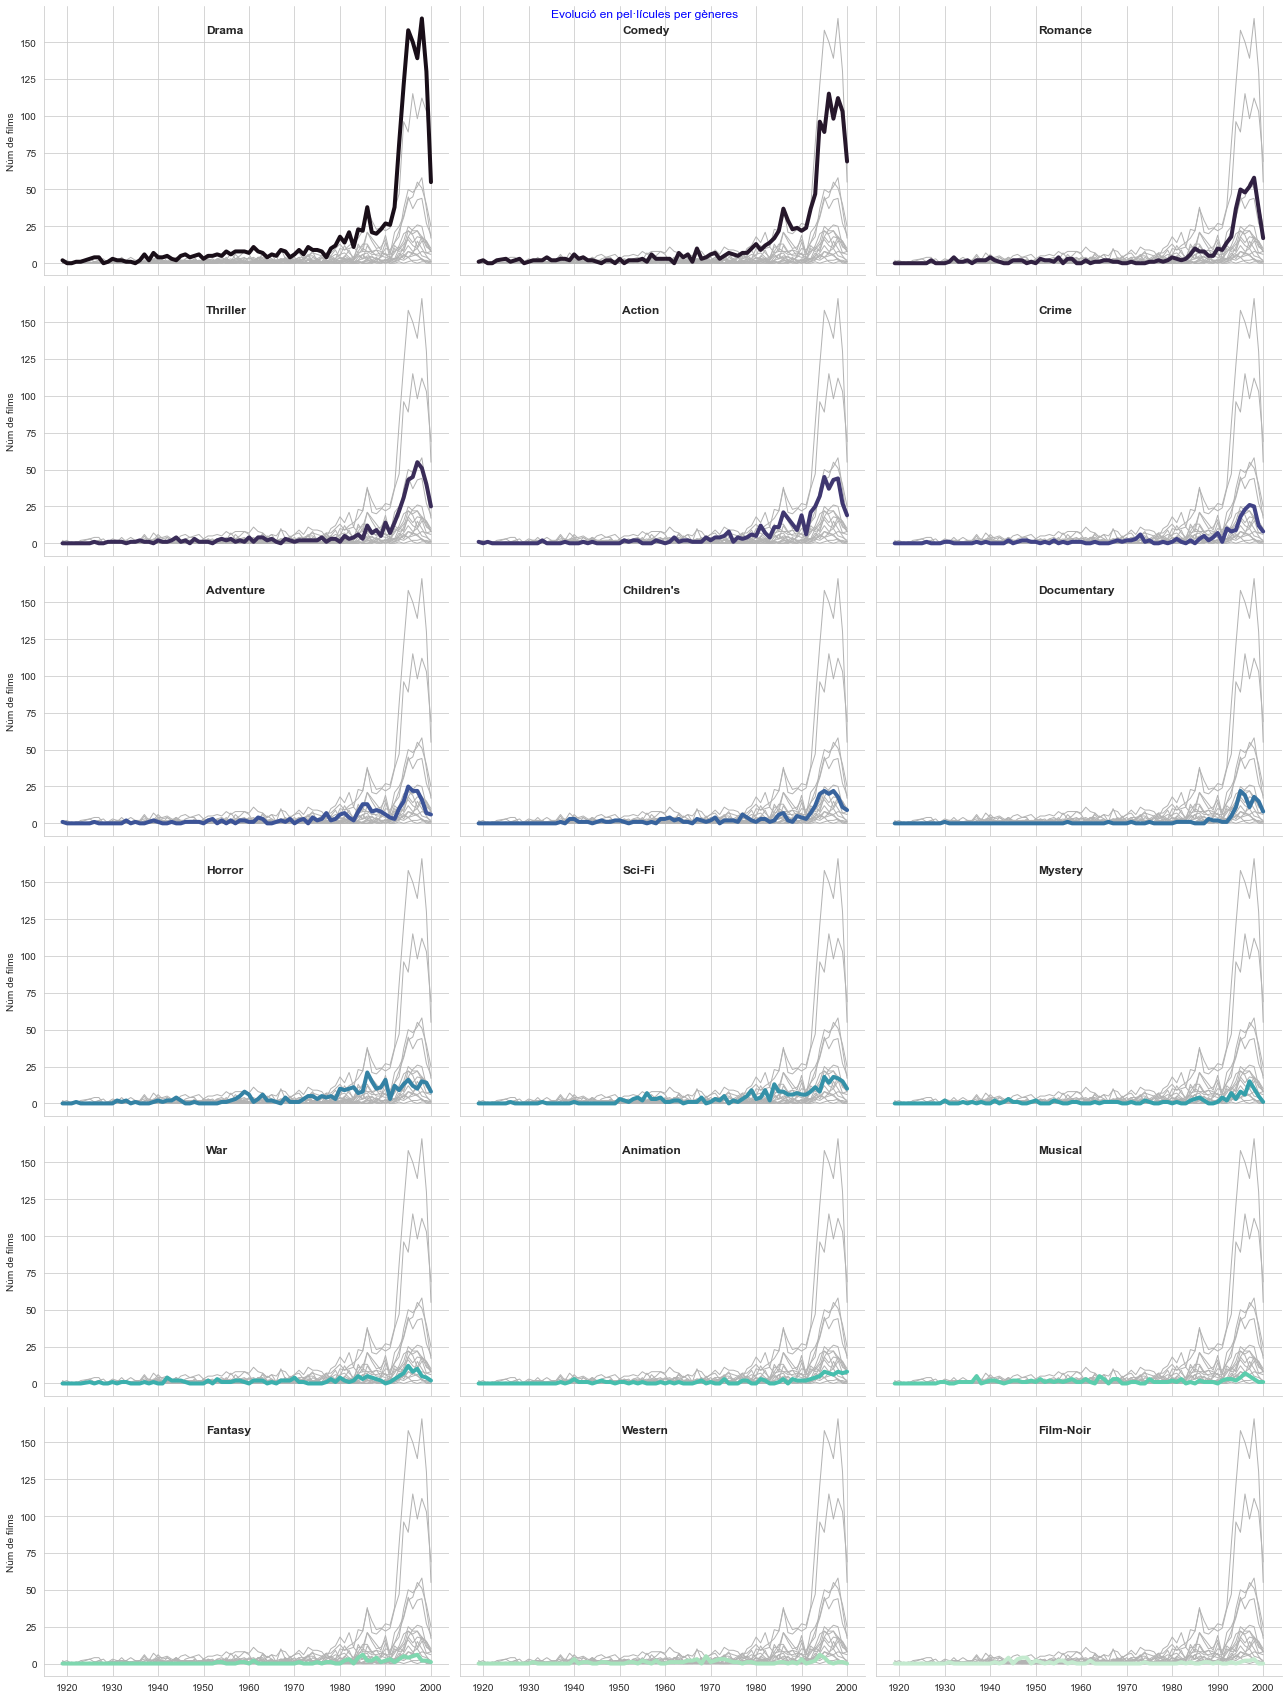

In [37]:
# https://seaborn.pydata.org/examples/timeseries_facets.html

data = movies.groupby(by='year')[cat_list].sum().stack().reset_index()
data.columns = ['year','cat','valor']

g = sns.relplot(data=data.sort_values(by='valor',ascending=False), x='year', y='valor', 
                col='cat', hue='cat', kind='line',
                linewidth=4, zorder=5, palette='mako',
               col_wrap=3, height=4, aspect=1.5, legend=False)

for cat, ax in g.axes_dict.items():
    ax.text(.4, .90, cat, transform=ax.transAxes, 
            fontweight='bold', fontsize=12)
    sns.lineplot(data=data, x='year', y='valor', units='cat', estimator=None,
                 color='.7', linewidth=1,
                 ax=ax, legend=False, )
# sns.lineplot(data=movies.groupby(by='year')[cat_list].sum()[movies[cat_list].sum().sort_values()[-5:].index], )

g.fig.suptitle('Evolució en pel·lícules per gèneres', fontdict=titleParams)

g.set_titles('')
g.set_axis_labels("", 'Núm de films')
g.tight_layout()

#### Mitja de gèneres per pel·lícula i any
- Tenen les pel·lícules noves més gèneres que les antigues? 
- Hi ha canvis en el tipus de pel·lícules amb els anys? (per exemple, més comèdies o drames)

<AxesSubplot:xlabel='year'>

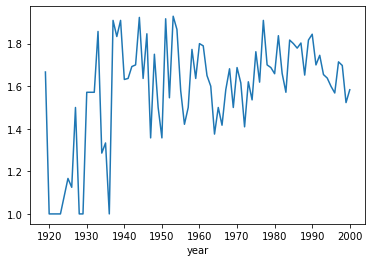

In [23]:
movies_year = pd.concat((movies.groupby(by='year')['name'].count(),
                movies.groupby(by='year')[cat_list].sum().sum(axis=1)), axis=1 )
movies_year.columns = ['num_movies','num_genres']

(movies_year.num_genres/movies_year.num_movies).plot()

In [24]:
movies_year = pd.concat((movies.groupby(by='year').agg({'movie_id':'count'}),
                        movies.groupby(by='year')[cat_list].sum()), axis=1)


movies_year.rename(columns={'movie_id':'num_films'}, inplace=True)

In [25]:
movies_year

,num_films,Fantasy,Documentary,Animation,Mystery,Romance,War,Musical,Children's,Sci-Fi,Crime,Western,Comedy,Drama,Film-Noir,Adventure,Horror,Thriller,Action
year,,,,,,,,,,,,,,,,,,,
1919,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
1920,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1922,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1923,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,345,5.0,19.0,7.0,6.0,48.0,8.0,7.0,20.0,14.0,23.0,1.0,115.0,150.0,2.0,22.0,12.0,45.0,37.0
1997,315,6.0,11.0,6.0,15.0,52.0,10.0,5.0,22.0,18.0,26.0,0.0,98.0,139.0,2.0,22.0,10.0,55.0,43.0
1998,337,2.0,18.0,8.0,10.0,58.0,5.0,3.0,18.0,17.0,25.0,1.0,112.0,166.0,3.0,16.0,15.0,51.0,44.0


In [26]:
movies_year['tot_cat'] = movies_year[cat_list].sum(axis=1)

np.divide(movies_year[cat_list], movies_year.num_films.values.reshape(-1,1))


# movies_year.loc[:,cat_list].div(movies_year.num_films, axis=0)

,Fantasy,Documentary,Animation,Mystery,Romance,War,Musical,Children's,Sci-Fi,Crime,Western,Comedy,Drama,Film-Noir,Adventure,Horror,Thriller,Action
year,,,,,,,,,,,,,,,,,,
1919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.333333,0.000000,0.000000,0.333333
1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000
1923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.014493,0.055072,0.020290,0.017391,0.139130,0.023188,0.020290,0.057971,0.040580,0.066667,0.002899,0.333333,0.434783,0.005797,0.063768,0.034783,0.130435,0.107246
1997,0.019048,0.034921,0.019048,0.047619,0.165079,0.031746,0.015873,0.069841,0.057143,0.082540,0.000000,0.311111,0.441270,0.006349,0.069841,0.031746,0.174603,0.136508
1998,0.005935,0.053412,0.023739,0.029674,0.172107,0.014837,0.008902,0.053412,0.050445,0.074184,0.002967,0.332344,0.492582,0.008902,0.047478,0.044510,0.151335,0.130564


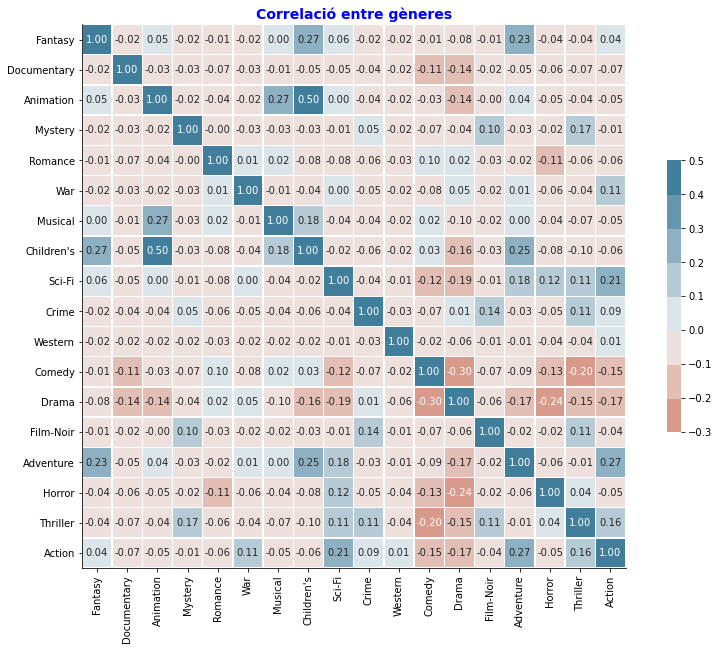

In [27]:
plt.figure(figsize=(15,10))

corr = movies[cat_list].corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(20, 230, n=10) # si volem un degradat 'continu' posem as_cmap=True 
g= sns.heatmap(corr,  cmap=cmap, center=0., annot=True, fmt='.2f',
            vmax=0.5, vmin=-.3,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

g.set_title('Correlació entre gèneres', fontdict=titleParams)

sns.despine()

Text(0.5, 0.98, 'Correlació entre gèneres')

<Figure size 1080x720 with 0 Axes>

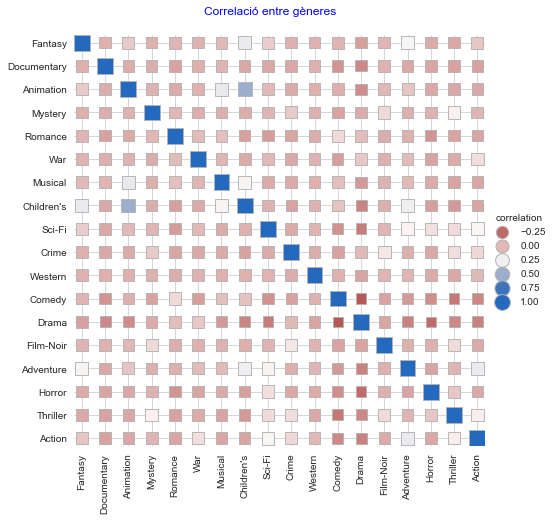

In [28]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
g = sns.relplot(data = corr.stack().reset_index(name='correlation'), 
            x='level_0', y='level_1', hue='correlation', size='correlation',
            palette='vlag_r', hue_norm=(-.4,.8), edgecolor='.7',
            marker=u',',
            height=7, sizes=(50,250), size_norm=(-.8, 1.))
#             cmap=cmap, center=0., annot=True, fmt='.2f',
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.grid()
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
g.fig.suptitle('Correlació entre gèneres', fontdict=titleParams)

In [29]:
movies.Drama.sum()

1603.0

In [30]:
(movies_year[cat_list].sum().sort_values(ascending=False) / len(movies) * 100).reset_index().rename(columns={'index':'cat',0:'valor'})

,cat,valor
0,Drama,41.282514
1,Comedy,30.903940
2,Action,12.953902
3,Thriller,12.670616
4,Romance,12.129797
5,Horror,8.833376
6,Adventure,7.288179
7,Sci-Fi,7.107906
8,Children's,6.464074
9,Crime,5.433943


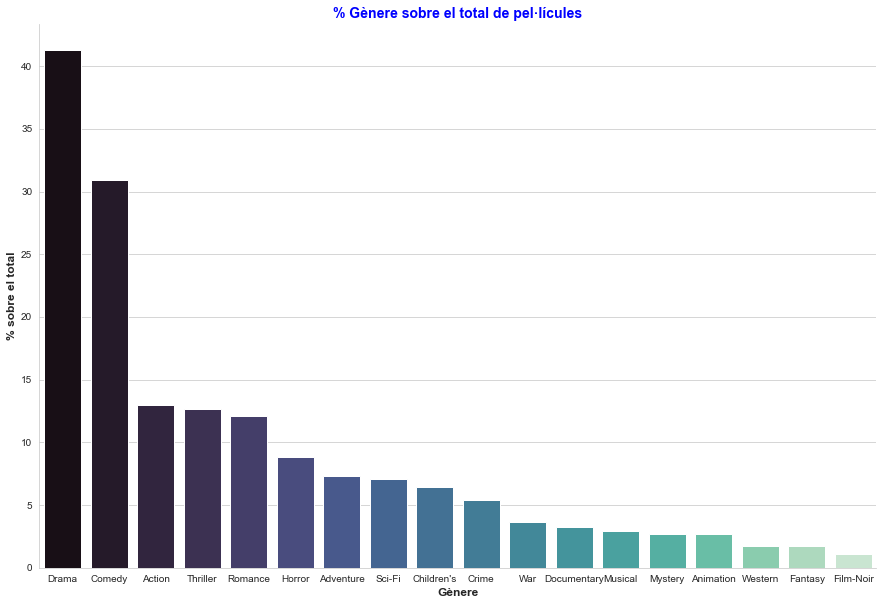

In [31]:
plt.figure(figsize=(15,10))
data = (movies_year[cat_list].sum().sort_values(ascending=False) / len(movies) * 100).reset_index().rename(columns={'index':'cat',0:'valor'}) 
g = sns.barplot(data=data, x='cat', y='valor', palette='mako')

g.set_title('% Gènere sobre el total de pel·lícules', fontdict=titleParams)

g.xaxis.set_label_text('Gènere', fontdict=axes_label_params)
g.yaxis.set_label_text('% sobre el total', fontdict=axes_label_params)

sns.despine()


In [32]:
len(movies[(movies.Adventure > 0) & (movies.Action>0)]) / len(movies[movies.Action >0])

0.2544731610337972

In [33]:
movies_year[cat_list]

,Fantasy,Documentary,Animation,Mystery,Romance,War,Musical,Children's,Sci-Fi,Crime,Western,Comedy,Drama,Film-Noir,Adventure,Horror,Thriller,Action
year,,,,,,,,,,,,,,,,,,
1919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,5.0,19.0,7.0,6.0,48.0,8.0,7.0,20.0,14.0,23.0,1.0,115.0,150.0,2.0,22.0,12.0,45.0,37.0
1997,6.0,11.0,6.0,15.0,52.0,10.0,5.0,22.0,18.0,26.0,0.0,98.0,139.0,2.0,22.0,10.0,55.0,43.0
1998,2.0,18.0,8.0,10.0,58.0,5.0,3.0,18.0,17.0,25.0,1.0,112.0,166.0,3.0,16.0,15.0,51.0,44.0


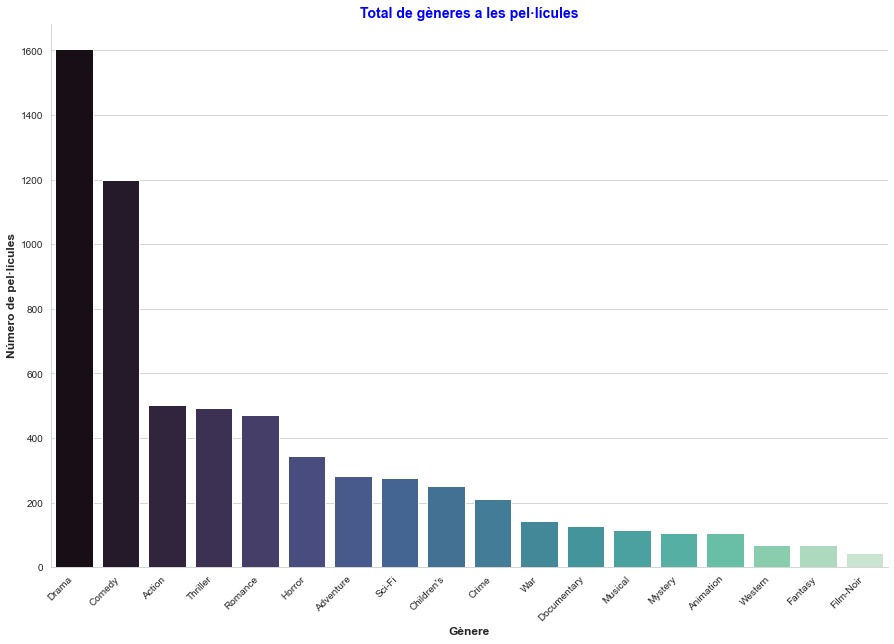

In [42]:
plt.figure(figsize=(15,10))
data = movies[cat_list].sum().sort_values(ascending=False)
g = sns.barplot(x=data.index, y=data, palette='mako')
labels = g.set_xticklabels(g.get_xticklabels(), rotation=45, 
                           horizontalalignment='right')

g.set_title('Total de gèneres a les pel·lícules', fontdict=titleParams)

g.xaxis.set_label_text('Gènere', fontdict=axes_label_params)
g.yaxis.set_label_text('Número de pel·lícules', fontdict=axes_label_params)

sns.despine()

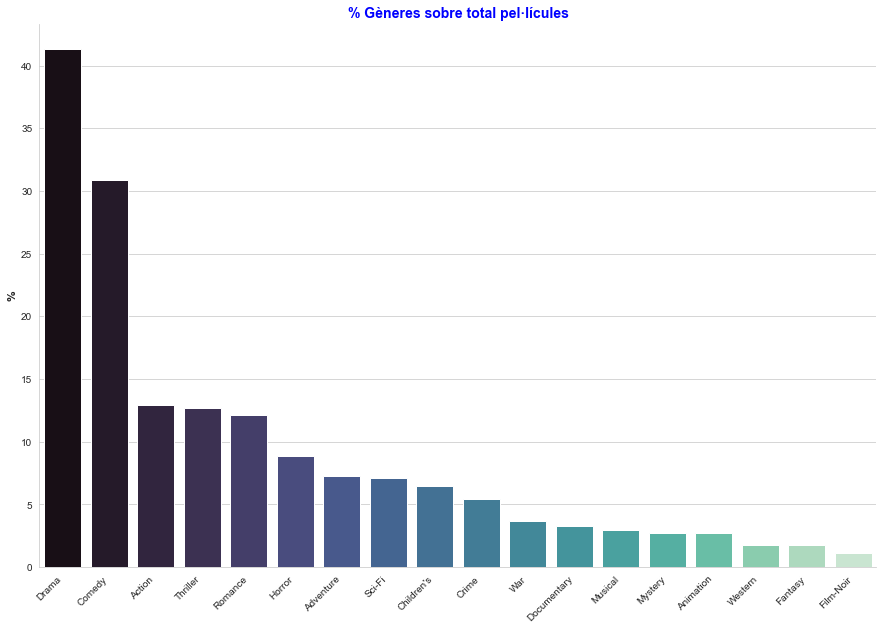

In [43]:
plt.figure(figsize=(15,10))
sns.set_style(style='whitegrid')
data = movies[cat_list].sum().sort_values(ascending=False)/ len(movies)
g = sns.barplot(x=data.index, y=data*100, palette='mako')
labels = g.set_xticklabels(g.get_xticklabels(), rotation=45, 
                           horizontalalignment='right')

g.set_title('% Gèneres sobre total pel·lícules', fontdict=titleParams)

# g.xaxis.set_label_text('Gènere', fontdict=axes_label_params)
g.yaxis.set_label_text('%', fontdict=axes_label_params)

sns.despine()

### Exercici 3
Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

In [51]:
# Llista de pel·lícules que tenen 'remake'

mov_group = movies.groupby(by='name')
mask = mov_group.movie_id.count() > 1
version_list = mask[mask == True].index.tolist()

# Comptem quantes versions hi ha
movies[movies.name.isin(version_list)].name.value_counts()



Hamlet                                         5
Mummy, The                                     3
Get Carter                                     2
Sabrina                                        2
101 Dalmatians                                 2
My Man Godfrey                                 2
Scarlet Letter, The                            2
Haunting, The                                  2
Jungle Book, The                               2
Thomas Crown Affair, The                       2
Nutty Professor, The                           2
King Kong                                      2
Man Who Knew Too Much, The                     2
True Crime                                     2
End of the Affair, The                         2
Wonderland                                     2
Othello                                        2
That Darn Cat!                                 2
Kid, The                                       2
Shaft                                          2
Miracle on 34th Stre

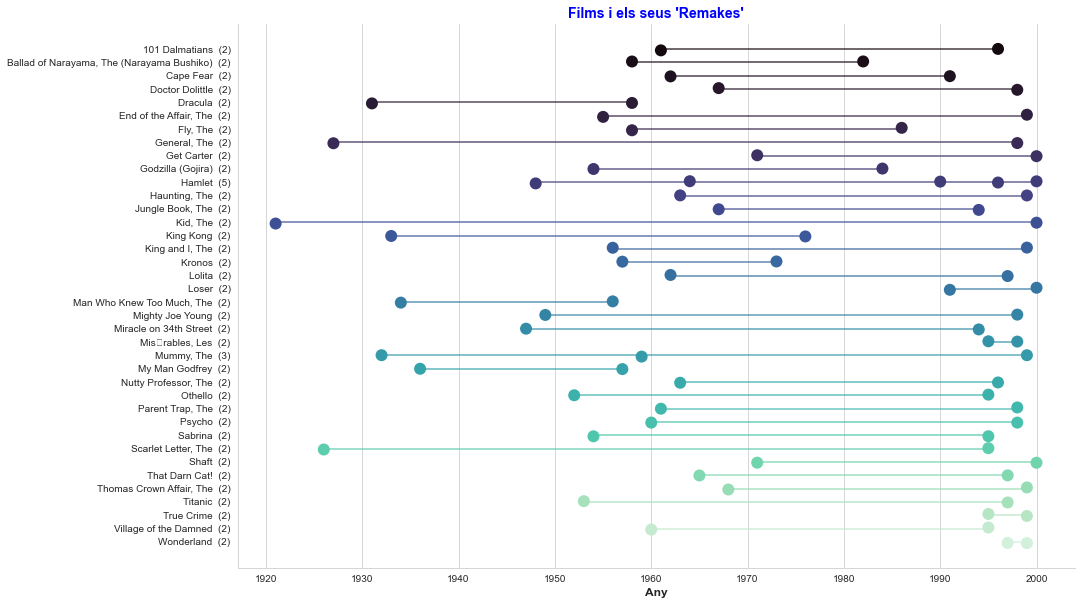

In [52]:

plt.figure(figsize=(15,10))


data = movies[movies.name.isin(version_list)][['name','year']].sort_values(by='name',ascending=True)
names = data.groupby('name').count()
names = (names.index + ' (' + names.year.astype(str) + ')').values


my_range = range(0, len(data.groupby('name').year.min().index))
g = sns.stripplot(data=data, x='year',y='name', size=12, palette='mako')
g.hlines(y=my_range, xmin=data.groupby('name')['year'].min(),
        xmax=data.groupby('name').year.max(), 
                color=sns.color_palette(palette='mako', n_colors=len(data.groupby('name')['year'].min())), alpha=0.8, )
g.yaxis.grid(False)
g.yaxis.set_label_text('')
g.axes.set_yticklabels(names)

g.xaxis.set_label_text('Any', fontdict=axes_label_params)

g.set_title("Films i els seus 'Remakes'", fontdict=titleParams)
# g.yaxis.tick_right()

sns.despine()

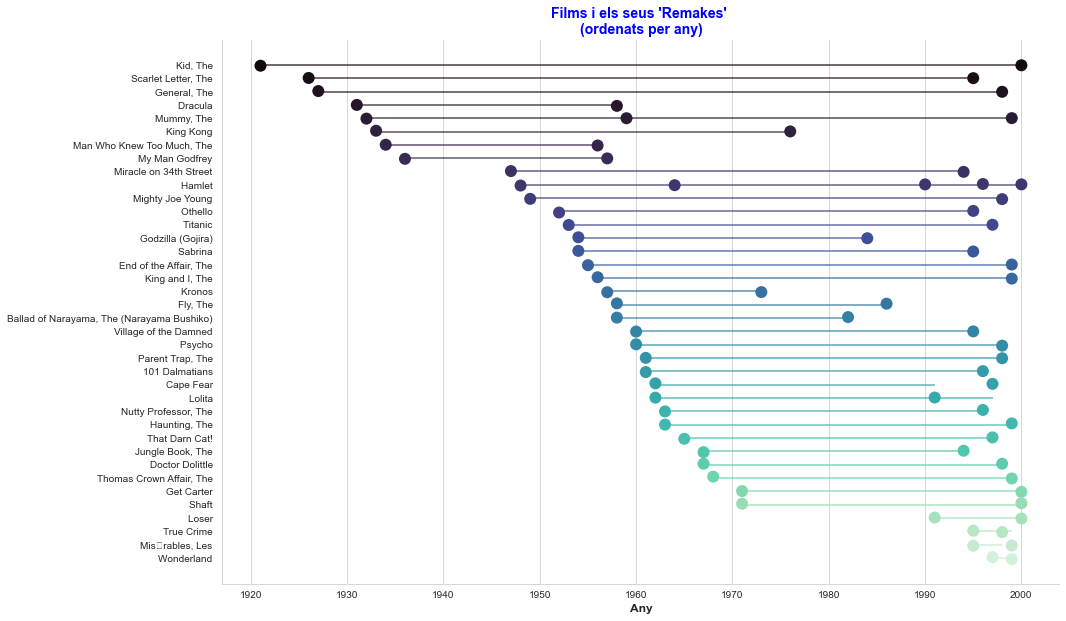

In [57]:
rcParams = {'axes.titlesize': 14, 
            'axes.titleweight':'bold',
            'axes.titlecolor':'blue',
            'horizontal_alignment':'center'}

plt.figure(figsize=(15,10))


data = movies[movies.name.isin(version_list)][['name','year']].sort_values(by='year',ascending=True)
names = data.groupby('name').count()
names = (names.index + ' (' + names.year.astype(str) + ')').values


my_range = range(0, len(data.groupby('name').min().index))

g = sns.stripplot(data=data, x='year',y='name', size=12, palette='mako')
g.hlines(y=my_range, 
         xmin=data.groupby('name').agg({'year':['min','max']}).sort_values(('year','min'))[('year','min')].values,
         xmax=data.groupby('name').agg({'year':['min','max']}).sort_values(('year','min'))[('year','max')].values, 
                color=sns.color_palette(palette='mako', n_colors=len(data.groupby('name')['year'].min())), alpha=0.8, )
g.yaxis.grid(False)
g.yaxis.set_label_text('')
g.axes.set_yticklabels(data.groupby('name').agg({'year':['min','max']}).sort_values(('year','min')).index)

g.xaxis.set_label_text('Any', fontdict={'fontsize':12, 'weight':'bold'})

g.set_title("Films i els seus 'Remakes' \n(ordenats per any)", fontdict={'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'color': rcParams['axes.titlecolor'],
        'verticalalignment': 'baseline'})
# g.yaxis.tick_right()




sns.despine()

In [61]:
data.groupby('name').agg({'year':['min','max']}).sort_values(('year','min'))[('year','min')]
data.groupby('name').agg({'year':['min','max']}).sort_values(('year','min'))[('year','max')]

name
Kid, The                                       2000
Scarlet Letter, The                            1995
General, The                                   1998
Dracula                                        1958
Mummy, The                                     1999
King Kong                                      1976
Man Who Knew Too Much, The                     1956
My Man Godfrey                                 1957
Miracle on 34th Street                         1994
Hamlet                                         2000
Mighty Joe Young                               1998
Othello                                        1995
Titanic                                        1997
Godzilla (Gojira)                              1984
Sabrina                                        1995
End of the Affair, The                         1999
King and I, The                                1999
Kronos                                         1973
Fly, The                                       1986
Ballad 

In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     3883 non-null   int64  
 1   Name         3883 non-null   object 
 2   Categories   3883 non-null   object 
 3   name         3883 non-null   object 
 4   year         3883 non-null   int64  
 5   cat_list     3883 non-null   object 
 6   Fantasy      3883 non-null   float64
 7   Documentary  3883 non-null   float64
 8   Animation    3883 non-null   float64
 9   Mystery      3883 non-null   float64
 10  Romance      3883 non-null   float64
 11  War          3883 non-null   float64
 12  Musical      3883 non-null   float64
 13  Children's   3883 non-null   float64
 14  Sci-Fi       3883 non-null   float64
 15  Crime        3883 non-null   float64
 16  Western      3883 non-null   float64
 17  Comedy       3883 non-null   float64
 18  Drama        3883 non-null   float64
 19  Film-N